# 02805 Assignment 1
## Part One: Network Models
### Watts-Strogatz Networks
* Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.

In [129]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

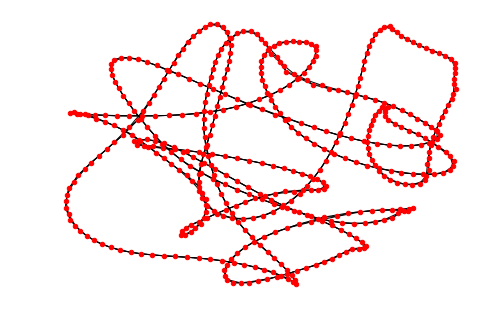

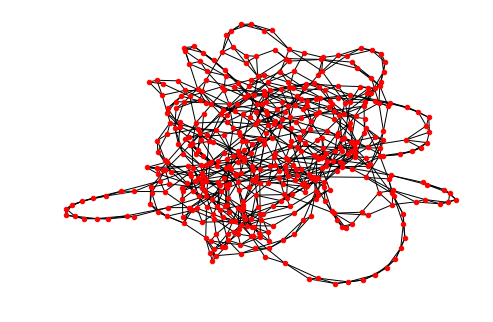

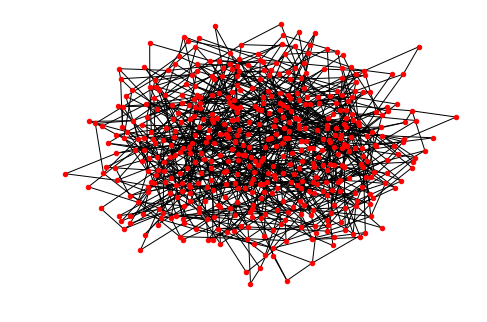

In [133]:
N, k_e, p = 500, 4, [0, 0.1, 1]
G1 = nx.watts_strogatz_graph(N, k_e, p[0])
G2 = nx.watts_strogatz_graph(N, k_e, p[1])
G3 = nx.watts_strogatz_graph(N, k_e, p[2])

nx.draw(G1, node_size=20)
plt.show()

nx.draw(G2, node_size=20)
plt.show()

nx.draw(G3, node_size=20)
plt.show()

In [137]:
dist1 = nx.average_shortest_path_length(G1)
dist2 = nx.average_shortest_path_length(G2)
dist3 = nx.average_shortest_path_length(G3)

In [139]:
print "Average shortest path (G1):", np.mean(dist1)
print "Average shortest path (G2):", np.mean(dist2)
print "Average shortest path (G3):", np.mean(dist3)
print "<d> =", np.log(N) / np.log(k_e)

Average shortest path (G1): 62.875751503006015
Average shortest path (G2): 7.459454909819639
Average shortest path (G3): 4.7395190380761525
<d> = 4.4828921423310435


* Let's understand the behavior of the WS model as we increase p in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).

In [9]:
def average_distances(p_values, m):
    n = len(p_values)
    d_avgs = np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            G = nx.watts_strogatz_graph(500, 4, p_values[i])
            d_avgs[i,j] = np.mean(dict(nx.shortest_path_length(G))[0].values())
    np.save("dist_matrix_6x50.npy", d_avgs)

In [10]:
p_values = [0, 0.01, 0.03, 0.05, 0.1, 0.2]

In [11]:
D = np.load("dist_matrix_6x50.npy")
D_avg = np.mean(D, axis=1)
D_std = np.std(D, axis=1)

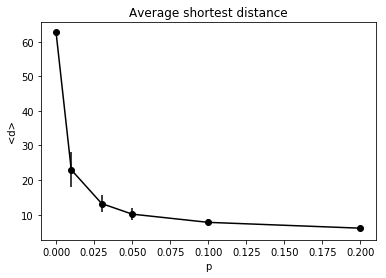

In [12]:
plt.errorbar(p_values, D_avg, yerr=D_std, fmt='-o', color="black")
plt.title("Average shortest distance")
plt.xlabel("p")
plt.ylabel("<d>")
plt.show()

## 2. The Barabasi-Albert Model
We're going to create our own Barabasi-Albert model (a special case) in right in a notebook. Follow the recipe below for success
* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.

In [62]:
import random

def flatten_edgelist(graph):
    return list(sum(graph.edges, ()))

def get_degrees(G):
    return sorted([d for n, d in G.degree()], reverse=True)
    
def BA_graph(N):
    # Create initial two nodes, with one link between them
    G = nx.Graph()
    G.add_edges_from([(0,1)])
    
    # Create the remaining N-2 nodes. Link based on degree
    for node in range(2, N):
        edges = flatten_edgelist(G)
        pick = random.choice(edges)
        G.add_edges_from([(node, pick)])
    
    return G

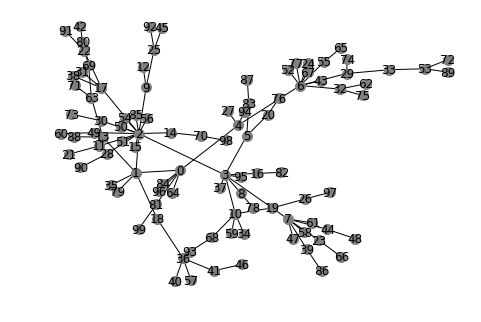

In [34]:
ba_graph_100 = BA_graph(100)
nx.draw(ba_graph_100, with_labels=True, node_color="gray", node_size=100)

* Now create a 5000 node network.

In [35]:
ba_graph_5k = BA_graph(5000)

* What's the maximum and minimum degree?

In [53]:
degrees_5k = get_degrees(ba_graph_5k)

In [56]:
print "maximum =", np.max(degrees_5k)
print "minimum =", np.min(degrees_5k)

maximum = 160
minimum = 1


* Now, bin the degree distribution, for example using numpy.histogram.
* Plot the distribution. Plot it with both linear and log-log axes.

In [64]:
def hist_to_scatter(degrees):
    v = range(min(degrees), max(degrees)+1)
    hist = np.histogram(degrees, bins=v)
    freqs, edges = hist[0], hist[1]
    n = freqs.size
    means = [(edges[i] + edges[i+1]) / 2 for i in range(n)]
    return freqs, means

def plot_degree_distribution(degrees):
    freqs, means = hist_to_scatter(degrees)
    plt.subplot(2,1,1)
    plt.plot(means, freqs, ".")
    plt.xlabel("k")
    plt.ylabel("frequency")

    plt.subplot(2,1,2)
    plt.loglog(means, freqs, ".")
    plt.xlabel("k")
    plt.ylabel("frequency")

    plt.show()

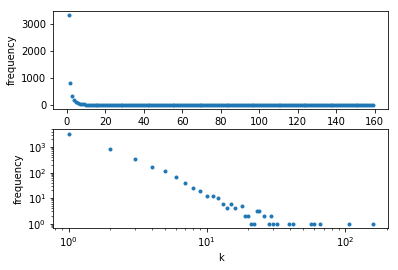

In [65]:
plot_degree_distribution(degrees_5k)

3. Power-laws and the friendship paradox

Next step is to explore the Friendship paradox. This paradox states that almost everyone have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

* Pick a node i at random (e.g. use random.choice). Find its degree.

In [73]:
nodes = list(ba_graph_5k.nodes)
node = random.choice(nodes)
print "degree =", ba_graph_5k.degree(node)

degree = 1


* Find i's neighbors. And calculate their average degree.

In [75]:
neighbors = list(ba_graph_5k.neighbors(node))
k_avg_neighbors = np.mean(dict(ba_graph_5k.degree(neighbors)).values())

In [ ]:
ba_graph_5k.average_degree

* Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.

In [76]:
print "neighbor avg:", k_avg_neighbors

neighbor avg: 57.0


* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

In [78]:
nodes = list(ba_graph_5k.nodes)
N = 0 # Number of times neighbors have more friends on avg
for _ in range(1000):
    node = random.choice(nodes)
    neighbors = list(ba_graph_5k.neighbors(node))
    k_avg_neighbors = np.mean(dict(ba_graph_5k.degree(neighbors)).values())
    k_node = ba_graph_5k.degree(node)
    if k_node < k_avg_neighbors:
        N += 1
        
print "Friendship paradox holds:", N, "/ 1000 times"

Friendship paradox holds: 869 / 1000 times


## Part Two: The network of American politics

In [80]:
import pandas as pd
h113, h114, h115 = pd.read_csv("dataset/h113.csv"), pd.read_csv("dataset/h114.csv"), pd.read_csv("dataset/h115.csv")
h113["congress_number"] = 113
h114["congress_number"] = 114
h115["congress_number"] = 115

all_members = pd.concat([h113, h114, h115]).reset_index(drop = True)

### 4. Basic stats for pages over time
Put together descriptive statistics for the US house of representatives over time (e.g. for the 113, 114 and 115th, congress).

* By the word member we mean a politician who has been elected to the house of representatives. Plot the number of members of the house of Representatives over time. You chose if you want to use a line-chart or a bar-chart. Is this development over time what you would expect? Why? Explain in your own words.


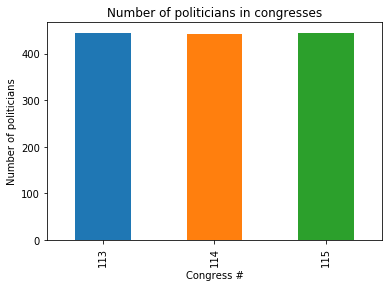

In [113]:
members = all_members.groupby("congress_number").size()
members.plot("bar")
plt.title("Number of politicians in congresses")
plt.xlabel("Congress #")
plt.ylabel("Number of politicians")
plt.show()

In [114]:
members

congress_number
113    444
114    442
115    445
dtype: int64

The number of memebers remains roughly the same, according to wikipedia the number of members is fixed at 435.

* How many members appear in all the three congresses? How many in two? How many in one? Plot your results using a histogram.


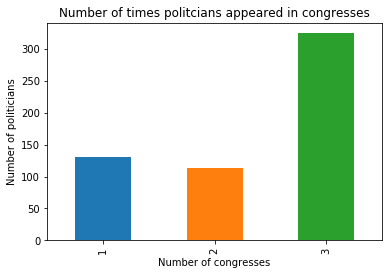

In [82]:
groups = all_members.groupby("WikiPageName")
times_in_congress = groups.size().sort_values()
times_in_congress_count = times_in_congress.groupby(times_in_congress).size()
times_in_congress_count.plot("bar")
plt.title("Number of times politcians appeared in congresses")
plt.xlabel("Number of congresses")
plt.ylabel("Number of politicians")
plt.show()

* Which states are more represented in the house of representatives? Which are less? Plot a histogram showing the number of members per state.


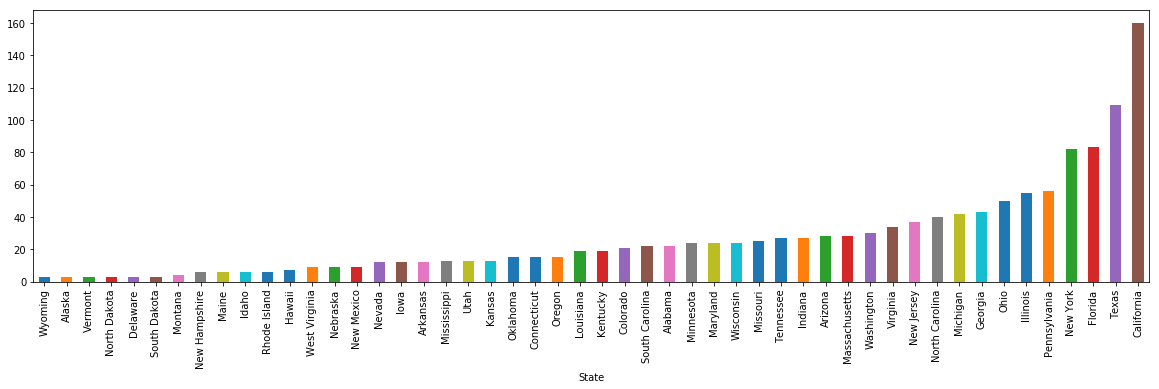

In [85]:
states = all_members.groupby("State")
states_representation = states.size().sort_values()
plt.figure(figsize=[20,5])
states_representation.plot("bar")
plt.show()

* How has the party composition of the house of representative changed over time? Plot your results.

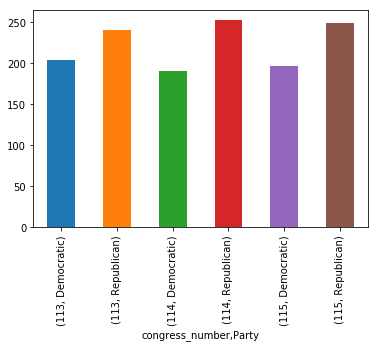

In [124]:
parties = all_members.groupby(["congress_number", "Party"])
parties_count = parties.size()
parties_count.plot("bar")
plt.show()

### 5. Basic stats for the network
Create simple network statistics for the 113th house of representatives.
* What is the number of nodes in the network? And the number of links?
* Plot the in and out-degree distributions.
* Who is the most connected representative?

In [106]:
import re
import io

def get_article_links(name, year):
    article_pattern = r'\[\[([^\]]*?)(?:\|.*?)*\]\]'
    path_folder = './h113_pages/'
    article = io.open(path_folder + name + year + '.txt', 'r', encoding='utf-8').read()
    article_links = re.findall(article_pattern, article)
    article_links = [a.encode('UTF-8').replace(' ', '_') for a in article_links]
    return article_links

In [107]:
df = pd.read_csv('./dataset/H113.csv', encoding='UTF-8')
wiki_page_names = list(df.WikiPageName)
wiki_page_names = np.array([name.encode('UTF8') for name in wiki_page_names])

In [108]:
DG = nx.DiGraph()

for i,name in enumerate(wiki_page_names):
    article_links = get_article_links(name, '2015')
    DG.add_node(name)
    for link in article_links:
        if link in wiki_page_names:
            DG.add_edge(name, link)

In [109]:
print 'Nodes', len(DG.nodes())
print 'Links', len(DG.edges())

Nodes 444
Links 1606


In [110]:
# Sorts by highest frequency of degree
def degree_sequence_sorted(graph):
    return sorted([d for n, d in graph.degree()], reverse=True)

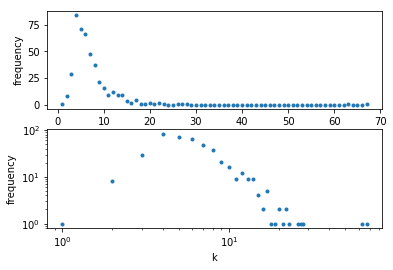

In [127]:
degrees = degree_sequence_sorted(DG)
plot_degree_distribution(degrees)

In [128]:
most_connected = sorted([(d,n) for n, d in DG.degree()], reverse=True)
node = most_connected[0][1]
print 'Most Connected node:', node
print 'Outgoing:', len(DG.out_edges(node))
print 'Incoming:', len(DG.in_edges(node))

Most Connected node: Nancy_Pelosi
Outgoing: 11
Incoming: 57
